In [43]:
import pandas as pd


In [44]:

vp1_data = pd.read_csv("enterovirus_a71_github/ev_a71/vp1/results/cleaned_metadata.tsv", sep='\t')

In [45]:
country_counts = vp1_data['country'].value_counts()



In [46]:
vp1_data.describe()

,accession,name,segment,date,host,country,abbreviation,virus,strain
count,9626,9626,32,9626,9602,9626,3892,9602,9626
unique,9626,9626,25,1300,5,58,28,2,9626
top,GQ117124,001_Luan_CHN__08,VP1,20XX-XX-XX,Human,China,C4,Human_enterovirus_71,001_Luan_CHN__08
freq,1,1,8,1404,8090,4784,1146,6432,1


In [47]:
print(country_counts)

China                       4784
Viet Nam                    1006
Taiwan                       887
Na                           537
Japan                        463
Malaysia                     282
Thailand                     270
Germany                      253
Netherlands                  237
Spain                        209
France                       123
Russia                        88
Cambodia                      77
India                         48
Singapore                     41
Brunei                        37
Finland                       32
Australia                     25
Hong Kong                     22
Hungary                       16
South Korea                   14
United Kingdom                14
Usa                           14
Canada                        14
Philippines                   14
Denmark                       11
Austria                       11
Poland                        10
Switzerland                    7
Indonesia                      7
Cameroon  

In [48]:
other_countries = pd.Series([country_counts.loc['Russia':'Ukraine'].sum()], index=['Other'])
print(other_countries)


Other    575
dtype: int64


In [49]:
country_counts_other = country_counts.loc['China':'France'].append(other_countries)

In [50]:
print(country_counts_other)

China          4784
Viet Nam       1006
Taiwan          887
Na              537
Japan           463
Malaysia        282
Thailand        270
Germany         253
Netherlands     237
Spain           209
France          123
Other           575
dtype: int64


/Users/simongrimm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Country'), Text(0, 0.5, 'n_sequences')]

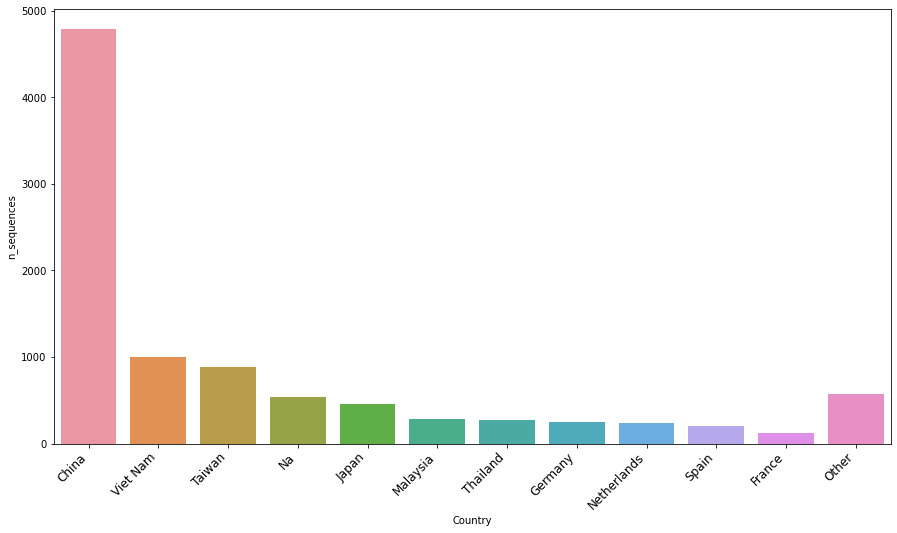

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plot = sns.barplot(country_counts_other.index, country_counts_other.values)
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
    fontweight='light',
    fontsize='large',
    
)
plot.set(xlabel='Country', ylabel='n_sequences' )


In [52]:
dates = vp1_data['date']


In [53]:
from datetime import datetime

nan_date_counter = 0
cleaned_date_counter = 0
unchanged_date_counter = 0

cleaned_dates = []



for date in dates:
    if date.count("XX") == 3:
        nan_date_counter += 1
        
    elif date.count("XX") == 2:
        newDate = date[:-6]
        cleaned_date_counter += 1
        date_time_obj = datetime.strptime(newDate, '%Y')
        cleaned_dates.append(date_time_obj)
        
    elif date.count("XX") == 1:
        newDate = date[:-3]
        cleaned_date_counter += 1
        date_time_obj = datetime.strptime(newDate, '%Y-%m')
        cleaned_dates.append(date_time_obj)
        
    elif date.count("XX") == 0 and len(date) == 10:
        newDate = date
        unchanged_date_counter += 1
        date_time_obj = datetime.strptime(newDate, '%Y-%m-%d')
        cleaned_dates.append(date_time_obj)
        
    else:
        nan_date_counter +=1
    
print(dates.count())
print(nan_date_counter)
print(cleaned_date_counter)
print(unchanged_date_counter)

9626
1422
5755
2449


In [54]:
dates_dataframe = pd.DataFrame(cleaned_dates, columns = ['date'])

In [55]:
print(dates_dataframe)

           date
0    2008-05-01
1    2010-01-01
2    2009-06-18
3    2011-01-01
4    2013-08-21
...         ...
8199 2008-08-01
8200 2008-08-01
8201 2008-08-01
8202 2008-08-01
8203 2008-08-01

[8204 rows x 1 columns]


In [56]:
grouped = dates_dataframe.groupby(dates_dataframe["date"].dt.year)

In [57]:
year_counts = dates_dataframe[(dates_dataframe['date'] > '1985-01-01')].groupby(dates_dataframe["date"].dt.year).count()


In [64]:
print(type(country_counts))
print(type(year_counts.squeeze()))
print(year_counts.squeeze())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
date
1986      45
1987       4
1990      11
1991      12
1992       7
1993       1
1994       7
1995       3
1996       1
1997      19
1998     133
1999      27
2000     139
2001     189
2002      97
2003     131
2004      70
2005      58
2006     173
2007     269
2008     662
2009     570
2010    1290
2011     761
2012     825
2013     619
2014     623
2015     355
2016     547
2017     401
2018      68
2019      34
Name: date, dtype: int64


<AxesSubplot:xlabel='date'>

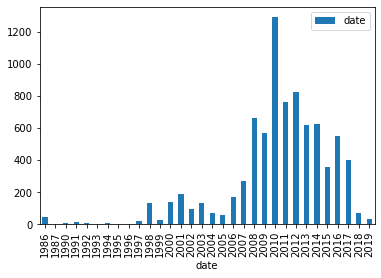

In [59]:
dates_dataframe[(dates_dataframe['date'] > '1985-01-01')].groupby(dates_dataframe["date"].dt.year).count().plot(kind="bar")

/Users/simongrimm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Sampling Year'), Text(0, 0.5, 'n_sequences')]

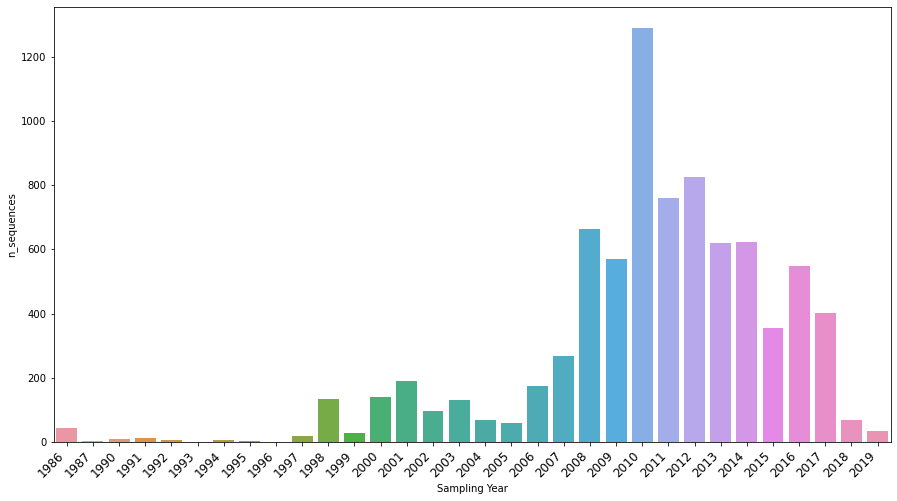

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plot = sns.barplot(year_counts.squeeze().index, year_counts.squeeze().values)
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
    fontweight='light',
    fontsize='large',
    
)
plot.set(xlabel='Sampling Year', ylabel='n_sequences' )


# Potential solution:

First, in the code above create a dataframe that marks 2012-01-01 as a datetime with year ONLY.

Calculate delta between the earliest date and all other dates.

Create histogram of this delta, but assign Dates to x axis.

Create Tick at 365 apart, calling it the beginning of that year.

The code below doesn't work.

In [ ]:
import pandas as pd

import plotly.express as px

df = pd.DataFrame()

df['Date'] = pd.Series(cleaned_dates)

df['year'] = df['Date'].dt.year

df['mthday'] = df['Date'].dt.strftime('%d-%b')

df=df.sort_values(by='Date') 

plot=px.line(df,x='Date',y='value',color='year')

In [ ]:
vp1_data["date"] = vp1_data["date"].astype("datetime64")
